In [51]:
import matplotlib.pyplot as plt
from IPython.display import Image

from src.environment import Environment
from src.transitions import Transitions
from src.agents.qlearner import QLearner
from src.agents.friend import FriendQ
from src.agents.foe import FoeQ
from src.agents.ceq import CEQ


In [35]:
import matplotlib as mpl
mpl.rcParams['agg.path.chunksize'] = 10000

def plot(x, key=None, title='Q-Learner', ylab='Q-value Difference', xlab='Simulation Iteration', 
         figname='qlearner', ylim=[0, 0.5], xlim=None):
    plt.plot(x)
    plt.title(title)
    plt.xlabel(xlab)
    plt.ylabel(ylab)
    plt.ylim(ylim)
    if xlim:
        plt.xlim(xlim)
    plt.savefig('plots/{}'.format(figname), dpi=300)
    plt.show()
    plt.close()

In [5]:
transitions = Transitions()

# Q-Learner

TOTAL TIME: 17.61 min (1056.7952 secs)

In [ ]:
q_env = Environment(transitions)
n_iter = 1000000
qlearner = QLearner(q_env, n_iterations=n_iter)
import time
start = time.time()
err, q1 = qlearner.run()
end = time.time()
print('TOTAL TIME: {}'.format(end - start))

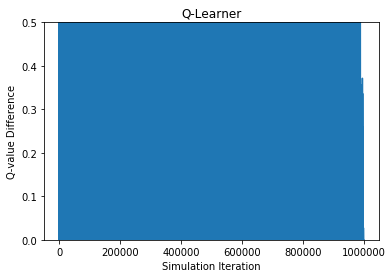

In [53]:
plot(err)
#Image(filename='plots/qlearner.png') 

# Friend-Q agent

TOTAL TIME: 15.542 minutes (932.52 secs)

In [ ]:
friendq_environment = Environment(transitions)
n_iter = 1000000
friendq = FriendQ(friendq_environment, n_iterations=n_iter)
import time
start = time.time()
friend_err, friend_q1 = friendq.run()
end = time.time()
print('TOTAL TIME: {}'.format(end - start))

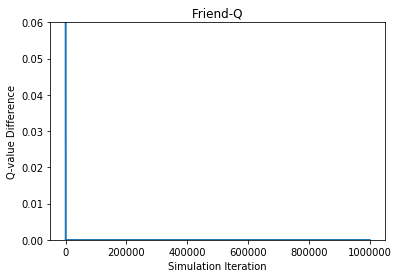

In [22]:
plot(friend_err, title='Friend-Q', figname='friendq', ylim=[0, 0.06])

# Foe-Q agent

TOTAL TIME: 21.493 mins (1289.5824 secs)

In [ ]:
foeq_err = None
foeq_environment = Environment(transitions)
gamma = .9 # discount
alpha = .2 # learning rate
e = .2 # epsilon
n_iter = 200000
foeq = FoeQ(foeq_environment, n_iterations=n_iter)
import time
start = time.time()
foeq_err, foe_q1 = foeq.run()
end = time.time()
print('TOTAL TIME: {}'.format(end - start))

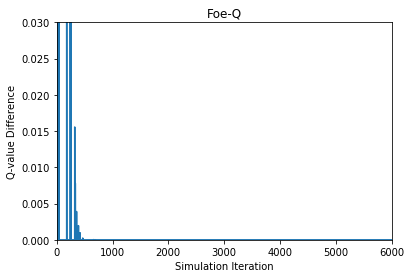

In [49]:
plot(foeq_err, title='Foe-Q', figname='foeq', ylim=[0, 0.03], xlim=[0, 6000])

# CEQ agent

TOTAL TIME: 364.68 mins (21881.084 secs)

In [ ]:
ceq_environment = Environment(transitions)
gamma = .99 # discount
alpha = .5 # learning rate
e = .9 # epsilon
n_iter = 1000000
import time
start = time.time()
ceq = CEQ(ceq_environment, eps=e, gamma=gamma, alpha=alpha, n_iterations=n_iter)
ceq_err, ce_q1 = ceq.run()
end = time.time()
print('TOTAL TIME: {}'.format(end - start))

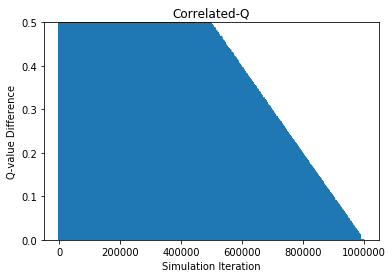

In [26]:
plot(ceq_err, title='Correlated-Q', figname='ceq')